In [40]:
import cv2
import argparse
import numpy as np

import matplotlib.pyplot as plt

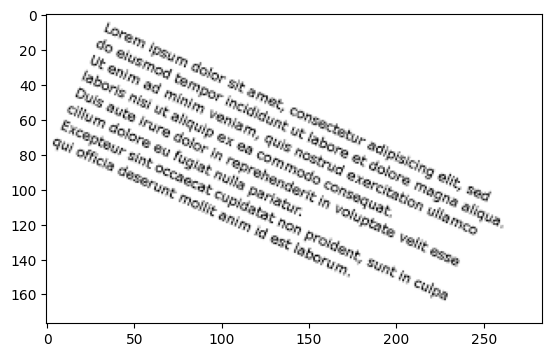

In [41]:
#画像表示
image = cv2.imread("imgs/skew.png") # lena image size: 512x512
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

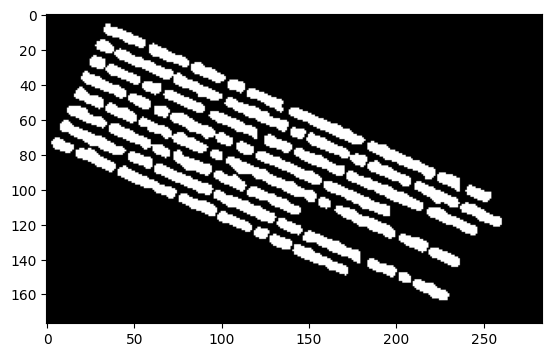

In [42]:
# Get the height and width from image
(height, width) = image.shape[:2]
# Copy of image
image_copy = image.copy()

#白黒画像へ
gray = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)

# 画像平滑する（Blurs an image using a Gaussian filter）
blur = cv2.GaussianBlur(gray, (7, 7), 0)

# ２値画像にする（Applies a fixed-level threshold to each array element）
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
plt.imshow(thresh)
plt.gray()


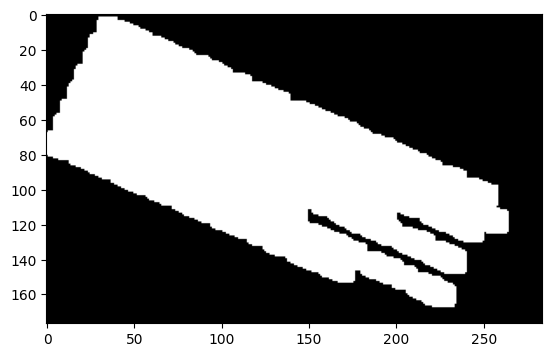

In [43]:
# Returns a structuring element of the specified size and shape for morphological operations
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
# 3x3膨張　（Dilates an image by using a specific structuring element）
dilate = cv2.dilate(thresh, kernel, iterations=4)
plt.imshow(dilate)
plt.gray()

[[31, -2], [272, 103], [237, 185], [-4, 78]]


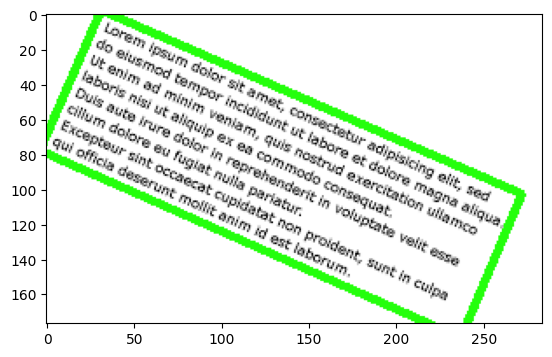

In [44]:
# 輪郭（Finds contours in a dilate image）
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

# 最小四角（Find a rectangle of the minimum area enclosing the input 2D point set）
rect = cv2.minAreaRect(cnts[0])
box = np.int0(cv2.boxPoints(rect))
# Draws contours outlines or filled contours
contours = cv2.drawContours(image_copy, [box], 0, (36, 255, 12), 3)
plt.imshow(contours)
plt.gray()

# Adjust box  co-ordinates in correct position
box = box.tolist()
if box[0][1] > box[1][0]:
    first_value = box[0]
    box.remove(box[0])
    box.append(first_value)
print(box)

In [45]:
# スキュー変換　（Wrap transformation with rectangle co-ordinations）
def WrapTransformation(image, points, width, height):
    # Define Input and Output Formation
    inputForm  = np.float32(points)
    outputForm = np.float32([[0, 0], [width, 0], [width, height], [0, height]])

    # Calculates a perspective transform from four pairs of the corresponding points
    matrix = cv2.getPerspectiveTransform(inputForm, outputForm)
    print(matrix)
    # WarpPerspective transforms the source image using the specified matrix
    WrapImage = cv2.warpPerspective(image, matrix, (width, height),
                                    cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT, borderValue=(0, 0, 0))

    return WrapImage


[[ 1.01221451e+00  4.42843848e-01 -3.04929621e+01]
 [-8.13437923e-01  1.86703371e+00  2.89506430e+01]
 [ 5.93957010e-05  6.33837583e-05  1.00000000e+00]]


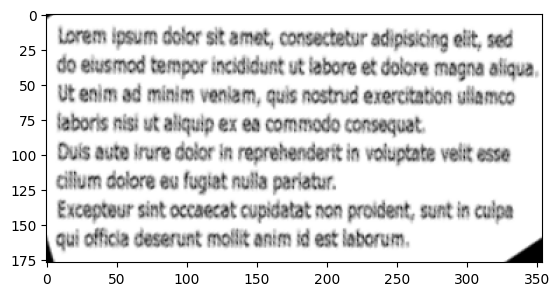

In [46]:
# Finally, Wrap Transformation with preprocess image
# You need to avoid negative co-ordinates, you will use above commented code
# And change the WrapTransformation function parameter 'box' to 'coords'
img_wrap = WrapTransformation(image, box, width, height)
# Resizes an image
img_out = cv2.resize(img_wrap, (width+70, height))
plt.imshow(img_out)
plt.gray()